# Fitting Hurst parameter to capture mean-reversion or trending behaviour in time series. Application to simulated fractional Brownian motion.

In [1]:
import numpy as np
from ito_diffusion_1d import *
from hurst_fitting import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [3]:
T = 1.0
SCHEME_STEPS = 250
LAGS = 10
ONE_PCT = 1e-2

## Synthetic data : fractional Brownian motion

* $H=\frac{1}{2}$ : Brownian motion
* $H<\frac{1}{2}$ : mean-reverting, rougher sample paths
* $H>\frac{1}{2}$ : trend-following, smoother sample paths

/home/sauxpa/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/home/sauxpa/Documents/python_scripts/Quant/diffusions/hurst_fitting.py:43: RuntimeWarning: divide by zero encountered in power
  return 0.5*(np.abs(lag+1)**(2*H)+np.abs(lag-1)**(2*H)-2*np.abs(lag)**(2*H))
/home/sauxpa/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


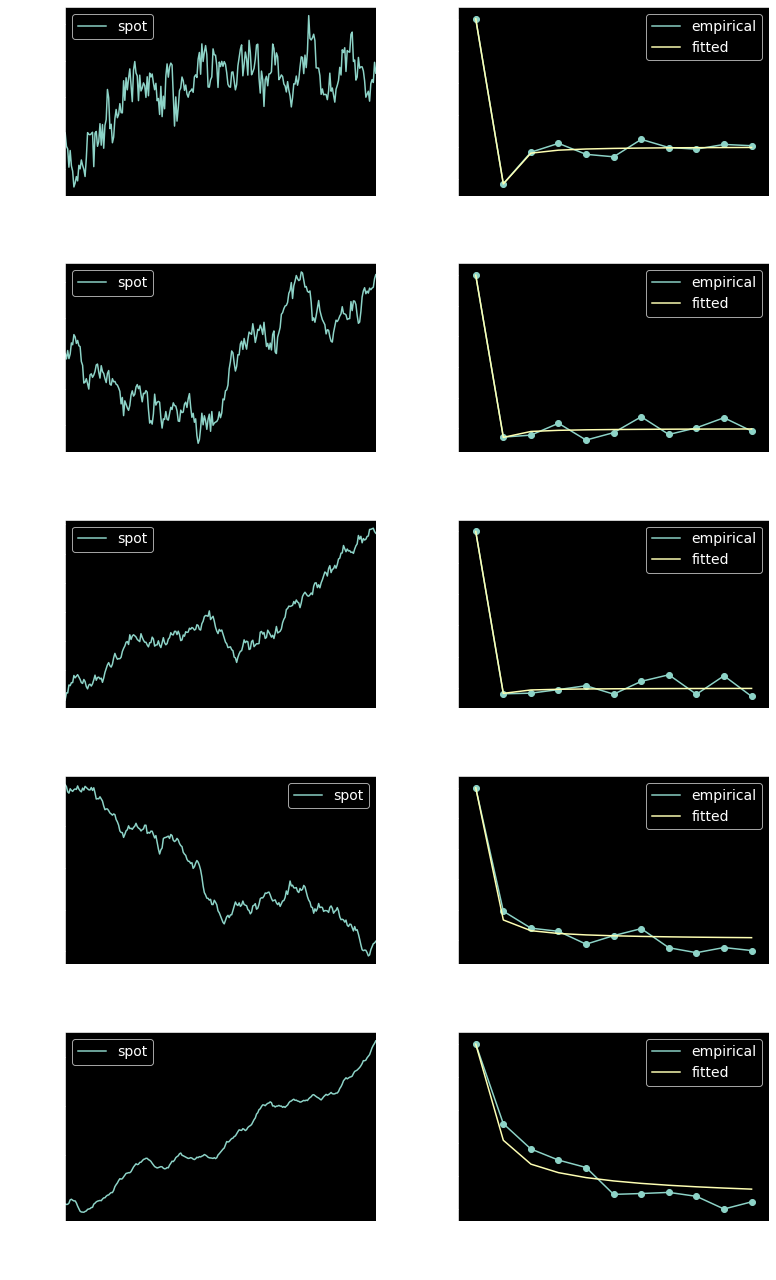

In [4]:
fig, axes = plt.subplots(nrows=5, ncols=2)

X = FBM(x0=100.0, T=T, scheme_steps=SCHEME_STEPS, drift=0.0, vol=1.0)
fitter = Hurst_fitter(n_lags=LAGS)

Hs = [0.3, 0.4, 0.5, 0.6, 0.9]

for i, ax_row in enumerate(axes):
    H = Hs[i]
    X.H = H
    df = X.simulate()
    
    # initialize Hurst fitter
    fitter.df = df
    H_fit = fitter.fit()
    
    ax = ax_row[0]
    df.plot(kind='line', ax=ax)
    ax.set_xlabel('time\nH={:.2f}'.format(H))
    ax.set_ylabel('spot')
    ax.legend()

    ax = ax_row[1]
    ys = acf(fitter.df_inc, nlags=LAGS)
    ys_fit = fitter.autocorr_frac_noise_range(H_fit)
    ax.plot(fitter.lag_range, ys, label='empirical')
    ax.scatter(fitter.lag_range, ys, marker='o')
    ax.plot(fitter.lag_range, ys_fit, label='fitted')
        
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    ax.set_xlabel('lag\nH={:.2f} (empirical) vs H={:.2f} (fitted) '.format(H, H_fit))
    ax.set_ylabel('autocorrelogram')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Less data

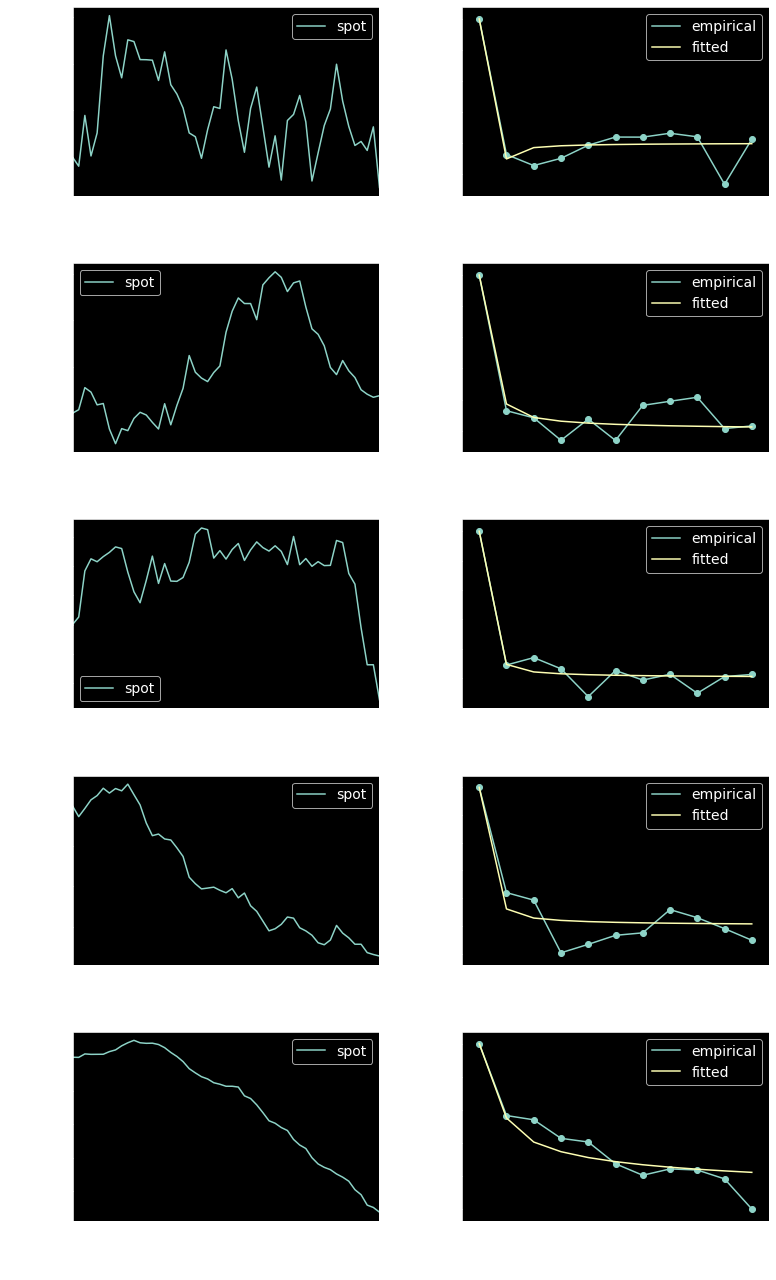

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=2)

X = FBM(x0=100.0, T=T, scheme_steps=SCHEME_STEPS // 5, drift=0.0, vol=1.0)
fitter = Hurst_fitter(n_lags=LAGS)

Hs = [0.3, 0.4, 0.5, 0.6, 0.9]

for i, ax_row in enumerate(axes):
    H = Hs[i]
    X.H = H
    df = X.simulate()
    
    # initialize Hurst fitter
    fitter.df = df
    H_fit = fitter.fit()
    
    ax = ax_row[0]
    df.plot(kind='line', ax=ax)
    ax.set_xlabel('time\nH={:.2f}'.format(H))
    ax.set_ylabel('spot')
    ax.legend()

    ax = ax_row[1]
    ys = acf(fitter.df_inc, nlags=LAGS)
    ys_fit = fitter.autocorr_frac_noise_range(H_fit)
    ax.plot(fitter.lag_range, ys, label='empirical')
    ax.scatter(fitter.lag_range, ys, marker='o')
    ax.plot(fitter.lag_range, ys_fit, label='fitted')
        
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    ax.set_xlabel('lag\nH={:.2f} (empirical) vs H={:.2f} (fitted) '.format(H, H_fit))
    ax.set_ylabel('autocorrelogram')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## More data

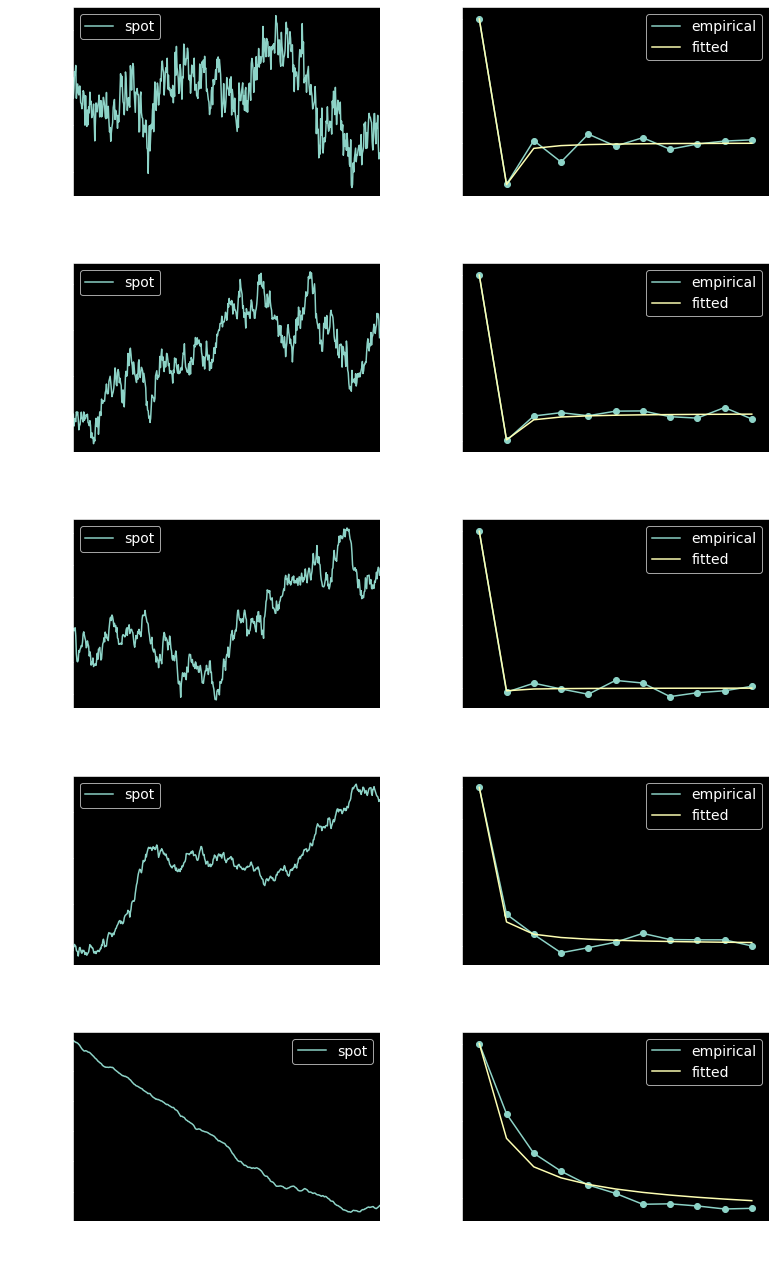

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=2)

X = FBM(x0=100.0, T=T, scheme_steps=SCHEME_STEPS * 2, drift=0.0, vol=1.0)
fitter = Hurst_fitter(n_lags=LAGS)

Hs = [0.3, 0.4, 0.5, 0.6, 0.9]

for i, ax_row in enumerate(axes):
    H = Hs[i]
    X.H = H
    df = X.simulate()
    
    # initialize Hurst fitter
    fitter.df = df
    H_fit = fitter.fit()
    
    ax = ax_row[0]
    df.plot(kind='line', ax=ax)
    ax.set_xlabel('time\nH={:.2f}'.format(H))
    ax.set_ylabel('spot')
    ax.legend()

    ax = ax_row[1]
    ys = acf(fitter.df_inc, nlags=LAGS)
    ys_fit = fitter.autocorr_frac_noise_range(H_fit)
    ax.plot(fitter.lag_range, ys, label='empirical')
    ax.scatter(fitter.lag_range, ys, marker='o')
    ax.plot(fitter.lag_range, ys_fit, label='fitted')
        
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    ax.set_xlabel('lag\nH={:.2f} (empirical) vs H={:.2f} (fitted) '.format(H, H_fit))
    ax.set_ylabel('autocorrelogram')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()